In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob

In [3]:
fdir = '/data2/GBT/S140/'

In [4]:
fnamesA = glob.glob(fdir+'Daisy/*/*_03_*B*rfireduced.npz')
fnamesA.sort()
print len(fnamesA)

24


In [5]:
fdiode, pdiode = np.load('../calibrations/lownoise_calibration_3C295_03_B.npy')

In [6]:
nz = np.load(fnamesA[5])
mask = nz['valid']
gain = pdiode / ( nz['xxon'] - nz['xxoff'])
ratio = nz['xxoff'] / nz['xxon']
calibd = (nz['xxoff'] * gain)
ele = nz['ELEVATIO'][::8]
freqs = nz['freqs']

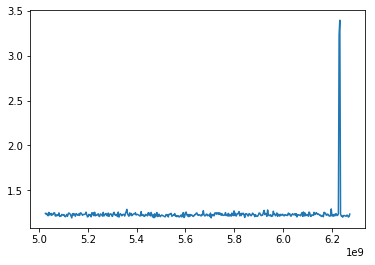

In [7]:
plot(nz['freqs'], calibd.max(0) / calibd.min(0))

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


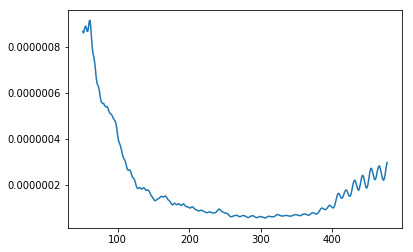

In [8]:
plot(np.nanmean(gain, 0))

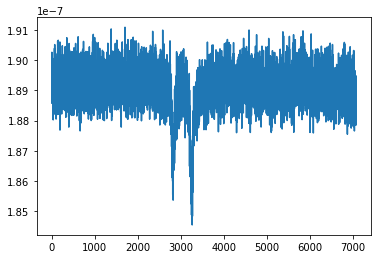

In [9]:
plot(np.nanmean(gain, 1))

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


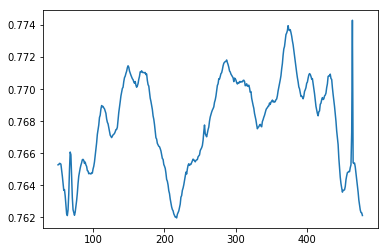

In [10]:
plot(np.nanmean(ratio, 0))

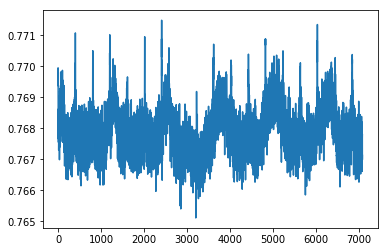

In [11]:
plot(np.nanmean(ratio, 1))

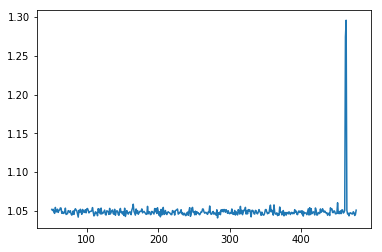

In [12]:
plot(ratio.max(0) / ratio.min(0))

In [13]:
sigma = np.sqrt(2.) / np.sqrt(1500.e6 / 512. * 0.02)

In [14]:
print sigma

0.00584237394672


In [15]:
noiseratio = ratio.std(0) / ratio.mean(0)

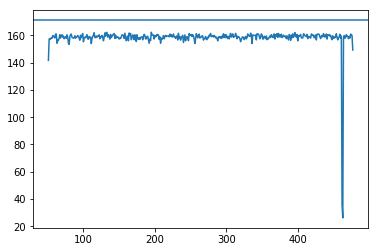

In [16]:
plot(ratio.mean(0) / ratio.std(0))
axhline(1. / sigma)

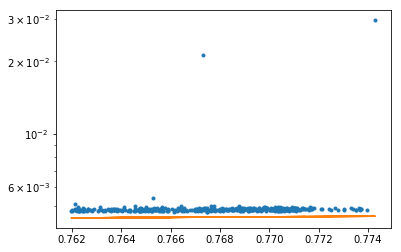

In [17]:
semilogy(ratio.mean(0), ratio.std(0), '.')
plot(ratio.mean(0), ratio.mean(0) * sigma)

(0, 0.1)

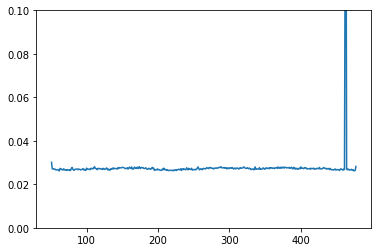

In [18]:
plot(calibd.std(0) / calibd.mean(0))
ylim(0, 0.1)

In [19]:
np.nanmedian(noiseratio) / sigma

1.0762423716828247

(0.005, 0.02)

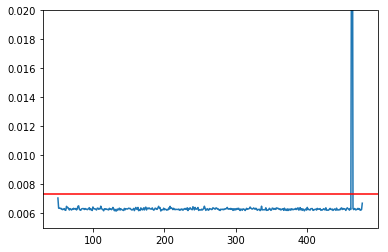

In [20]:
plot(ratio.std(0) / ratio.mean(0))
axhline(1.25 * sigma, color='r')
ylim(0.005, 0.02)

In [21]:
allhist = []
bins = np.linspace(-.1, 0.1, 50)
for k in range(512):
    try:
        allhist.append(np.histogram(calibd[:,k] / np.mean(calibd[:,k]) - 1., bins=bins)[0])
    except ValueError:
        pass
allhist = np.array(allhist)

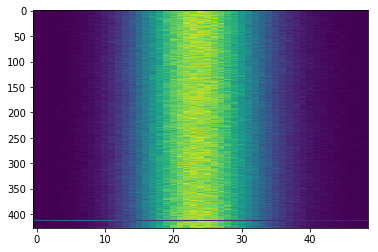

In [22]:
imshow(allhist, aspect='auto')

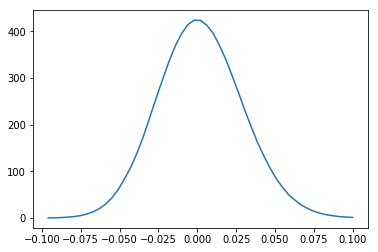

In [23]:
plot(bins[1:], allhist.mean(0))

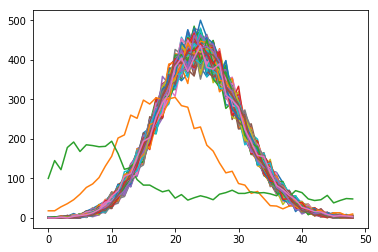

In [24]:
plot(allhist.T);

In [25]:
bad = noiseratio > ( 1.25 * sigma )

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


In [26]:
mask[bad] = False

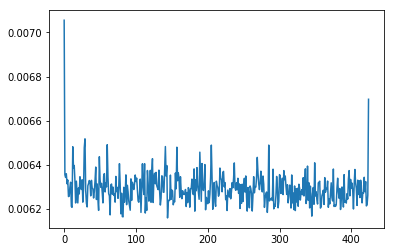

In [27]:
plot(noiseratio[mask])

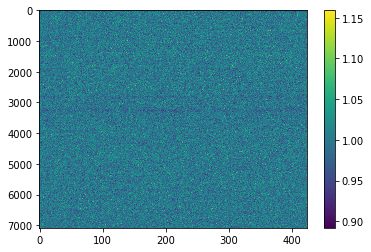

In [28]:
imshow(gain[:, mask] / gain[:, mask].mean(0), aspect='auto')
colorbar()

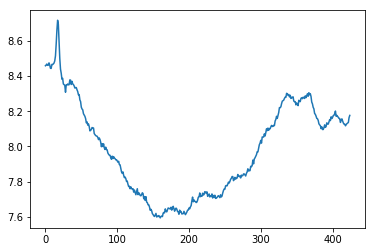

In [29]:
plot(calibd[:, mask].mean(0))

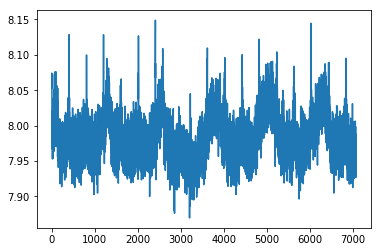

In [30]:
plot(calibd[:, mask].mean(1))

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


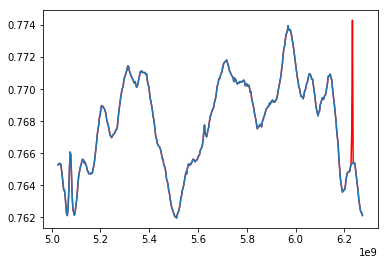

In [31]:
plot(freqs, np.nanmean(ratio, 0), 'r')
plot(freqs[mask], np.nanmean(ratio[:,mask], 0))

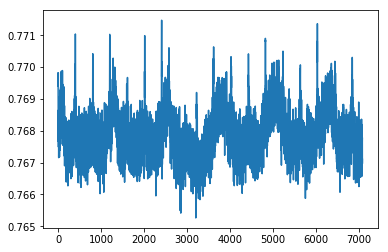

In [32]:
plot(np.nanmean(ratio[:, mask], 1))

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


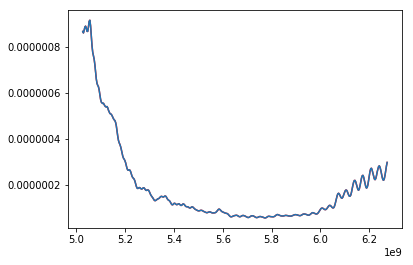

In [33]:
plot(freqs, np.nanmean(gain, 0), 'r')
plot(freqs[mask], np.nanmean(gain[:,mask], 0))

In [34]:
def mad(x, axis=None):
    return np.nanmedian(np.abs(x - np.nanmedian(x, axis)), axis)

In [35]:
gainmedian = np.nanmedian(np.nanmean(gain[:, mask], 1))
gainmad = mad(np.nanmean(gain[:, mask], 1))

In [36]:
gainmad

3.8823670957712782e-10

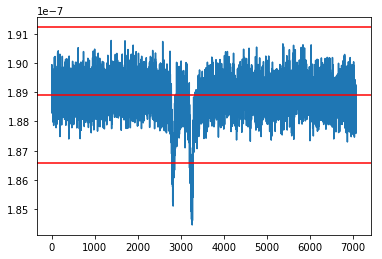

In [37]:
plot(np.nanmean(gain[:, mask], 1))
axhline(gainmedian, color='r')
axhline(gainmedian + 6. * gainmad, color='r')
axhline(gainmedian - 6. * gainmad, color='r')

In [38]:
tmask = np.abs(np.nanmean(gain[:, mask], 1) - gainmedian) < (6. * gainmad)

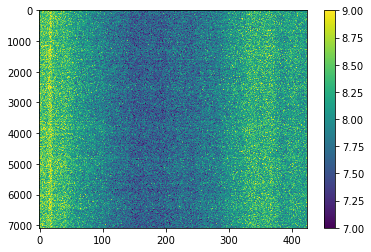

In [41]:
imshow(calibd[:, mask], aspect='auto')
colorbar()
clim(7, 9)

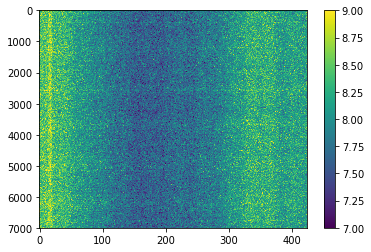

In [42]:
imshow(calibd[tmask,:][:,mask], aspect='auto')
colorbar()
clim(7, 9)

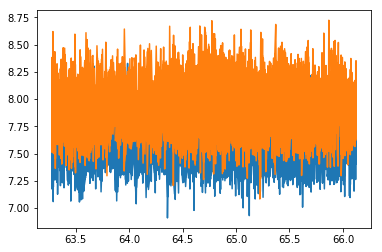

In [43]:
plot(ele[tmask], calibd[tmask,:][:,mask][:,200])
plot(ele[tmask], calibd[tmask,:][:,mask][:,100])

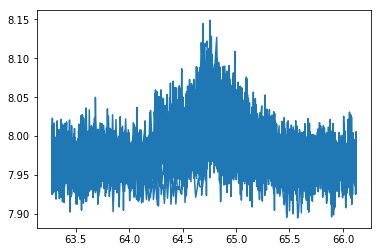

In [44]:
plot(ele[tmask], np.nanmean(calibd[tmask,:][:,mask], 1))

(5, 14)

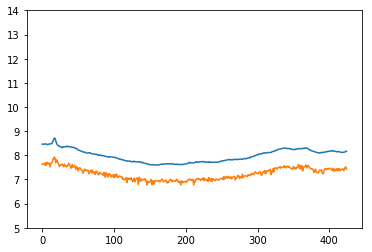

In [45]:
plot(calibd[tmask,:][:,mask].mean(0))
plot(calibd[tmask,:][:,mask].min(0))
ylim(5, 14)

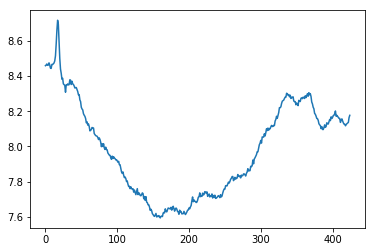

In [46]:
plot(calibd[tmask,:][:,mask].mean(0))

In [47]:
ts = np.arange(calibd.shape[0])

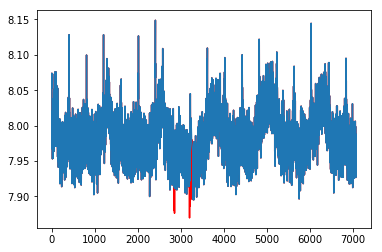

In [48]:
plot(ts, calibd[:, mask].mean(1), 'r')
plot(ts[tmask], calibd[tmask,:][:,mask].mean(1))